# 6. Visualizations

**Author:** Tori Stiegman   
**Project:** Gender-Inclusive Language in Tweets about Menstruation: Capstone Edition   
**Date turned in:** Dec 19, 2022                                              
**Updated:** March 3, 2023

**About this notebook:** In this notebook I will run different analyses and create various visualizations to help me understand what my classifier was doing as well as the nature of the Tweets (whether or not they were gender-inclusive).

**Table of Contents**
1. [Load and Format data](#data)
2. [Looking at how the model preformed](#preform)
3. [Visualizations](#visualizations)
    1. [Sankey Plot of Test Dataset](#sankey)
    2. [Pie chart of Full Dataset](#pie)
    3. [Barplots of Most Common Words](#bar)

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import advertools as adv
import seaborn as sns

# get rid of warnings pls
import warnings
warnings.filterwarnings('ignore')

<a name="data"></a>
## Load and Format Data

In [116]:
pd.set_option('display.max_colwidth', -1)
allTweets = pd.read_csv("allTweets_labeled.csv")
testTweets = pd.read_csv("test_clean.csv")
trainingTweets = pd.read_csv("train_clean.csv")

In [1]:
# allTweets.head(1)
# testTweets.head(1)

### Seporate probe statistics into new collumns

Create seporate columns, `exclusive_probe`, `inclusive_probe` and `neither_probe`, for each probe value. 

In [100]:
# define fuctions
getExclusive = lambda x: float(x.strip('[]').split(',')[0])
getInclusive = lambda x: float(x.strip('[]').split(',')[1])
getNeither = lambda x: float(x.strip('[]').split(',')[2])

In [101]:
# do for allTweets
allTweets['exclusive_probe'] = allTweets['probe'].apply(getExclusive)
allTweets['inclusive_probe'] = allTweets['probe'].apply(getInclusive)
allTweets['neither_probe'] = allTweets['probe'].apply(getNeither)

In [102]:
# # do for testTweets
# testTweets['exclusive_probe'] = testTweets['probe'].apply(getExclusive)
# testTweets['inclusive_probe'] = testTweets['probe'].apply(getInclusive)
# testTweets['neither_probe'] = testTweets['probe'].apply(getNeither)

In [103]:
# allTweets.head()

<a name="preform"></a>
## Looking at how the model preformed

Look at how the model preformed on the test dataset. Also look at statistics about the probe task for each of the predicted labels for the Full dataset. 

#### Probe Tast Statistics

In [104]:
allTweets[["predicted_label", "exclusive_probe", "inclusive_probe", "neither_probe"]].groupby("predicted_label").median()

,exclusive_probe,inclusive_probe,neither_probe
predicted_label,,,
exclusive,0.590343,0.059163,0.117649
inclusive,0.155818,0.158648,0.431380
neither,0.113085,0.069730,0.731702


The model was the most confident in predicting tweets in the "neither" category. It was then the next confident in predicting "exclusive" tweets, and then "inclusive" tweets. 

## Creating Visualizations

<a name="pie"></a>
### Pie chart of Full Dataset

Here I will create a pie chart that will display the percentage of type of gendered words (inclusive, exclusive, neither) used in my corpus of tweets. 

In [106]:
allTweets["predicted_label"].value_counts()

neither      189962
exclusive    73266 
inclusive    37590 
Name: predicted_label, dtype: int64

Text(0.5, 1.0, 'Types of Tweets in Full Dataset')

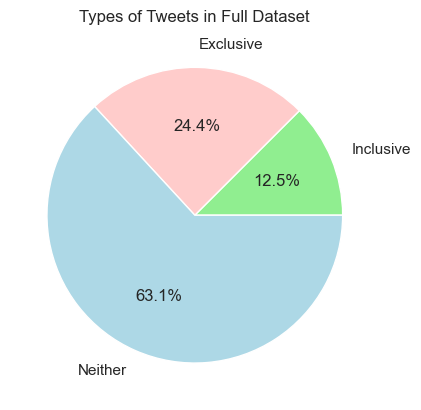

In [113]:
plt.ion
# create random data
names='Inclusive', 'Exclusive', 'Neither',
values=[37590,73266,189962]

# Create a set of colors
colors = ['#90EE90', '#FFCCCB', '#ADD8E6']

# Use it thanks to the color argument
plt.pie(values, labels=names, labeldistance=1.15, autopct='%1.1f%%', wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors)
plt.title("Types of Tweets in Full Dataset")

It should be noted that the proportions of the tweets that are labeled as "inclusive," "exclusive" and "neither" is not proportional to the proportions we find in the training and testing data sets. This could be a product of the sampling design -- the population of tweets was split in to strata based on whether or not they contained specific words (filtered dataset: n = 10319; full dataset: n = 301155). This filtered dataset made up about 3% of the total dataset. This was to make sure that the model saw a good amount of instances of "exclusive" and "inclusive" language since it was predicted that there would be much less "inclusive" language than "exclusive" or "neither" language. 

<a name="pie"></a>
### Pie chart of Training Dataset

Here I will create a pie chart that will display the percentage of type of gendered words (inclusive, exclusive, neither) used in my corpus of tweets. 

In [111]:
trainingTweets["label"].value_counts()

neither      143
exclusive    73 
inclusive    64 
Name: label, dtype: int64

Text(0.5, 1.0, 'Types of Tweets in Training Dataset')

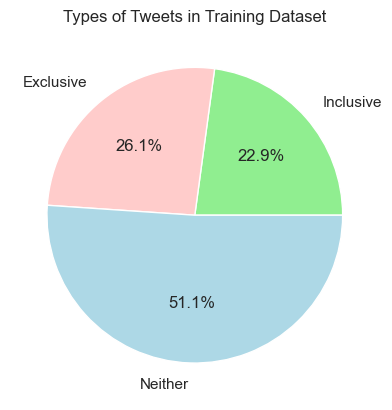

In [115]:
plt.ion
# create random data
names='Inclusive', 'Exclusive', 'Neither',
values=[64,73,143]

# Create a set of colors
colors = ['#90EE90', '#FFCCCB', '#ADD8E6']

# Use it thanks to the color argument
plt.pie(values, labels=names, labeldistance=1.15, autopct='%1.1f%%', wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors)
plt.title("Types of Tweets in Training Dataset")

<a name="pie"></a>
### Pie chart of Test Dataset

Here I will create a pie chart that will display the percentage of type of gendered words (inclusive, exclusive, neither) used in my corpus of tweets. 

In [117]:
testTweets["label"].value_counts()

neither      24
exclusive    16
inclusive    16
Name: label, dtype: int64

Text(0.5, 1.0, 'Types of Tweets in Test Dataset')

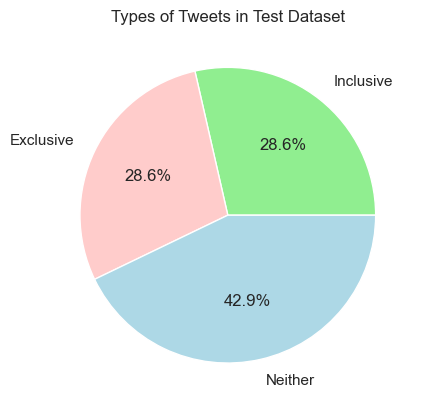

In [118]:
plt.ion
# create random data
names='Inclusive', 'Exclusive', 'Neither',
values=[16,16,24]

# Create a set of colors
colors = ['#90EE90', '#FFCCCB', '#ADD8E6']

# Use it thanks to the color argument
plt.pie(values, labels=names, labeldistance=1.15, autopct='%1.1f%%', wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors)
plt.title("Types of Tweets in Test Dataset")

<a name="bar"></a>
### Barplots of Most Common Words

#### Most Common Words in the Full Dataset

In [126]:
# find the most common words
common_words_all = adv.word_frequency(text_list=allTweets['text']).sort_values(['abs_freq'], ascending=False).head(60)

In [127]:
# # remove "", "&amp" and "#menstruation" and "-"

# common_words_all = common_words_all.drop(labels=[6,7,8, 12], axis=0)

In [128]:
all20 = common_words_all.head(20)

##### Make Visualization

[Text(0.5, 1.0, 'Most Common Words in All Tweets'),
 Text(0.5, 0, 'Word'),
 Text(0, 0.5, 'Frequency')]

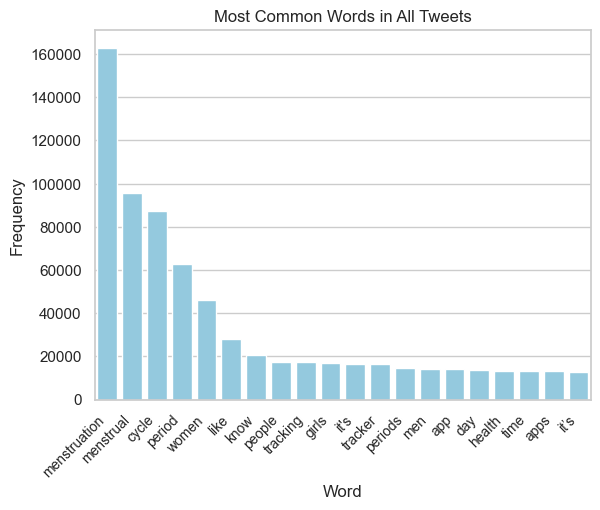

In [129]:
sns.set_theme(style="whitegrid")

chart_all = sns.barplot(
    data=all20,
    x="word",
    y = "abs_freq",
    color = "skyblue"
)

chart_all.set_xticklabels(
    chart_all.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'
)

chart_all.set(title = "Most Common Words in All Tweets",
         xlabel = "Word",
         ylabel = "Frequency")

#### Most Common Words in the Neither Dataset

Find the most common words

In [61]:
common_words_neither = adv.word_frequency(text_list= allTweets[allTweets["predicted_label"] == "neither"]['text'] ).sort_values(['abs_freq'], ascending=False).head(60)

In [62]:
# # remove "", "&amp" and "#menstruation" and "-"
# common_words_neither = common_words_neither.drop(labels=[5, 8, 12, 13], axis=0)

In [63]:
neither20 = common_words_neither.head(20)

##### Make Visualization

[Text(0.5, 1.0, "Most Common Words in Tweets Labeled 'Neither'"),
 Text(0.5, 0, 'Word'),
 Text(0, 0.5, 'Frequency')]

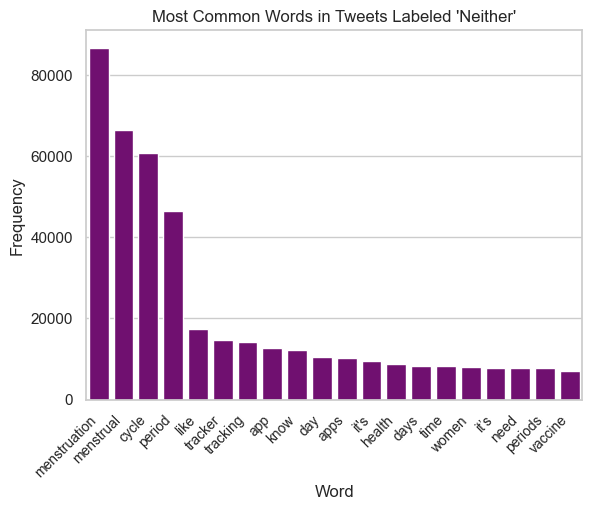

In [64]:
sns.set_theme(style="whitegrid")

chart_neither = sns.barplot(
    data=neither20,
    x="word",
    y = "abs_freq",
    color = "purple"
)

chart_neither.set_xticklabels(
    chart_neither.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'
)

chart_neither.set(title = "Most Common Words in Tweets Labeled 'Neither'",
         xlabel = "Word",
         ylabel = "Frequency")

#### Most Common Words in the Inclusive Dataset

Find the most common words

In [70]:
common_words_inclusive = adv.word_frequency(text_list= allTweets[allTweets["predicted_label"] == "inclusive"]['text'] ).sort_values(['abs_freq'], ascending=False).head(60)


In [71]:
# remove "", "&amp" and "#menstruation" and "-"
# common_words_inclusive = common_words_inclusive.drop(labels=[8, 9, 14, 15], axis=0)

In [72]:
inclusive20 = common_words_inclusive.head(20)

##### Make Visualization

[Text(0.5, 1.0, "Most Common Words in Tweets Labeled 'Inclusive'"),
 Text(0.5, 0, 'Word'),
 Text(0, 0.5, 'Frequency')]

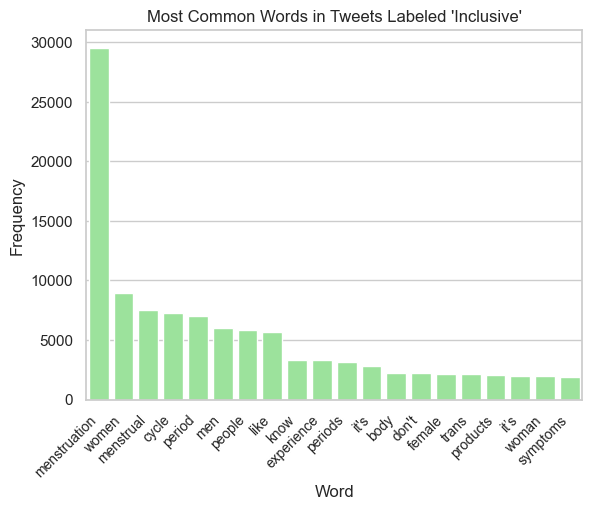

In [73]:
sns.set_theme(style="whitegrid")

chart_inclusive = sns.barplot(
    data=inclusive20,
    x="word",
    y = "abs_freq",
    color = "lightgreen"
)

chart_inclusive.set_xticklabels(
    chart_inclusive.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'
)

chart_inclusive.set(title = "Most Common Words in Tweets Labeled 'Inclusive'",
         xlabel = "Word",
         ylabel = "Frequency")

#### Most Common Words in the Exclusive Dataset

Find the most common words

In [78]:
common_words_exclusive = adv.word_frequency(text_list= allTweets[allTweets["predicted_label"] == "exclusive"]['text'] ).sort_values(['abs_freq'], ascending=False).head(60)


In [81]:
# remove "", "&amp" and "#menstruation" and "-"
# common_words_exclusive = common_words_exclusive.drop(labels=[6, 8, 9, 14], axis=0)

In [82]:
exclusive20 = common_words_exclusive.head(20)

##### Make Visualization

[Text(0.5, 1.0, "Most Common Words in Tweets Labeled 'Exclusive'"),
 Text(0.5, 0, 'Word'),
 Text(0, 0.5, 'Frequency')]

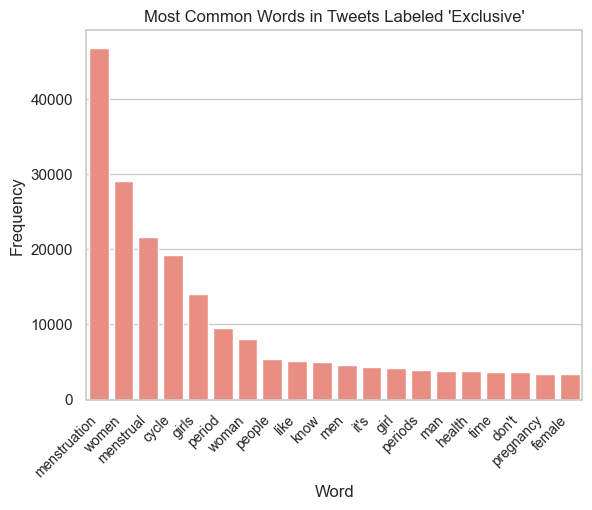

In [83]:
sns.set_theme(style="whitegrid")

chart_exclusive = sns.barplot(
    data=exclusive20,
    x="word",
    y = "abs_freq",
    color = "salmon"
)

chart_exclusive.set_xticklabels(
    chart_exclusive.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'
)

chart_exclusive.set(title = "Most Common Words in Tweets Labeled 'Exclusive'",
         xlabel = "Word",
         ylabel = "Frequency")